### Stuent Performance Indicator EDA and Preprocessing


#### 1. Introduction
The project is about understanding how students performance in exams, i.e. their test scores, are affected by other variables such as Gender, Race, Paternal level of education, Lunch and Test preparation Course.

##### Objective of this Notebook
The objective of this notebook is to do the necessary EDA and preprocessing steps so that we can draw meaningful insights from the data and also transform it into a suitable format for modeling. This ensures that the model can learn the patterns in the data in an optimal way.

#### 2. Load Libraries and Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Load the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Initial Data Exploration

Before we try to fit our data to the model, let us try to understand or get to know the data. Let us see what are its columns, how it is structured and so on.

Getting to know the data will help us in understanding how exactly we will need to transform the data for the best fit possible.

##### View the dataset structure

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


##### Shape of the daataset

In [5]:
rows , columns = df.shape
print('No of Records:',rows)
print('No of Features:', columns)

No of Records: 1000
No of Features: 8


##### Data types of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Summary Statistics

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Basic understanding of features

In [8]:
# Basic understanding of features
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [19]:
# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype!= 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

# print these features
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [ ]:
for col in ['gender', 'race/ethnicity', 'parental level of education',
            'lunch', 'test preparation course']:
    print(col, df[col].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']


KeyError: 'parental_level_of_education'

In [ ]:
#

##### 4. Missing Values Analysis

##### Count missing values

In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

&#128273; **NOTE:** As we can see there seems to be no missing values in any of the columns which indicate either the data was collected with no missing values or it has already been removed prior of downloading.

#### 5. Data Preprocessing

##### Data cleaning

In [ ]:
# The names of the features
col = df.columns
for c in col:
    print(c)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


In [ ]:
# checking for duplicates
df.duplicated().sum()


np.int64(0)

In [12]:
# make column names lowercase and consistent
df.columns = df.columns.str.strip().str.lower().str.replace(r"[ /]", "_", regex=True)



In [13]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [15]:
# Strip spaces (if any)
for col in ['gender', 'race_ethnicity', 'parental_level_of_education', 
            'lunch', 'test_preparation_course']:
    df[col] = df[col].str.strip()

In [16]:
for col in ['gender', 'race_ethnicity', 'parental_level_of_education',
            'lunch', 'test_preparation_course']:
    print(col, df[col].unique())


gender ['female' 'male']
race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test_preparation_course ['none' 'completed']


##### Data Engineering

In [30]:
# Adding columns for "Total Score" and "Average"
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avergae,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


In [33]:
reading_full = (df['reading_score'] == 100).sum()
writing_full = (df['writing_score'] == 100).sum()
math_full = (df['math_score'] == 100).sum()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [32]:
reading_fail = (df['reading_score'] <= 20).sum()
writing_fail = (df['writing_score'] <= 20).sum()
math_fail = (df['math_score'] <= 20).sum()

print(f'Number of students with less than 20 marks in Maths: {math_fail}')
print(f'Number of students with less than 20 marks in Reading: {reading_fail}')
print(f'Number of students with less than 20 marks in Writing: {writing_fail}')


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


**Insights**
- From the above we have students have performed worst in maths
- Students have performed the best in reading

#### 6. Exploring data (through visualization)

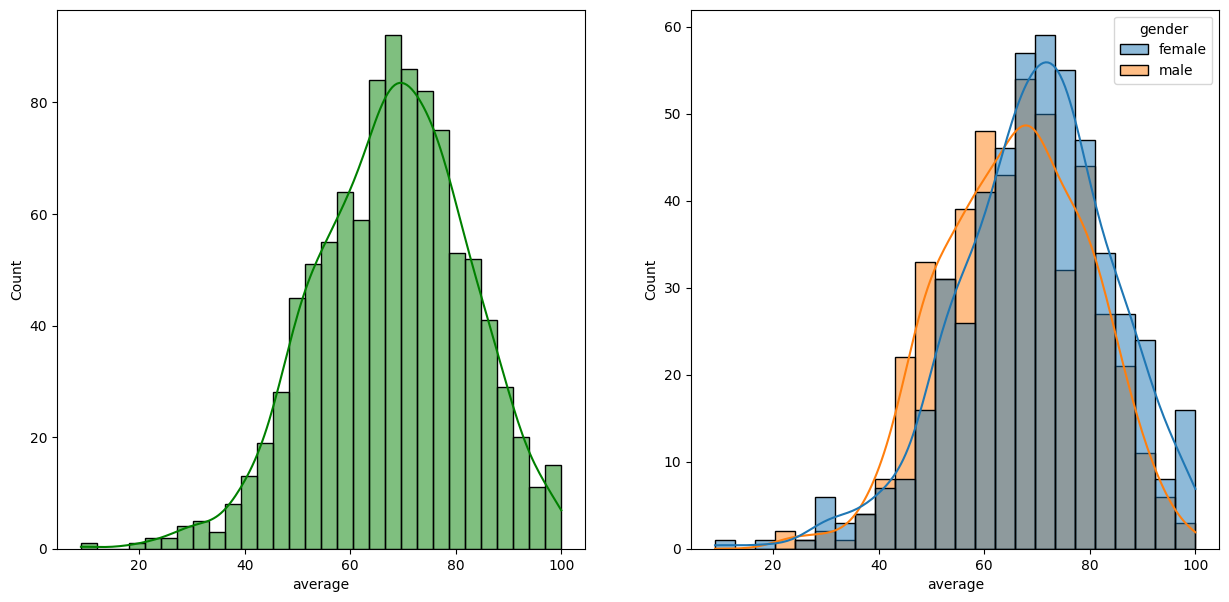

In [35]:
# Histogram and KDE
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

**Insights**
- Female students perform better than male students

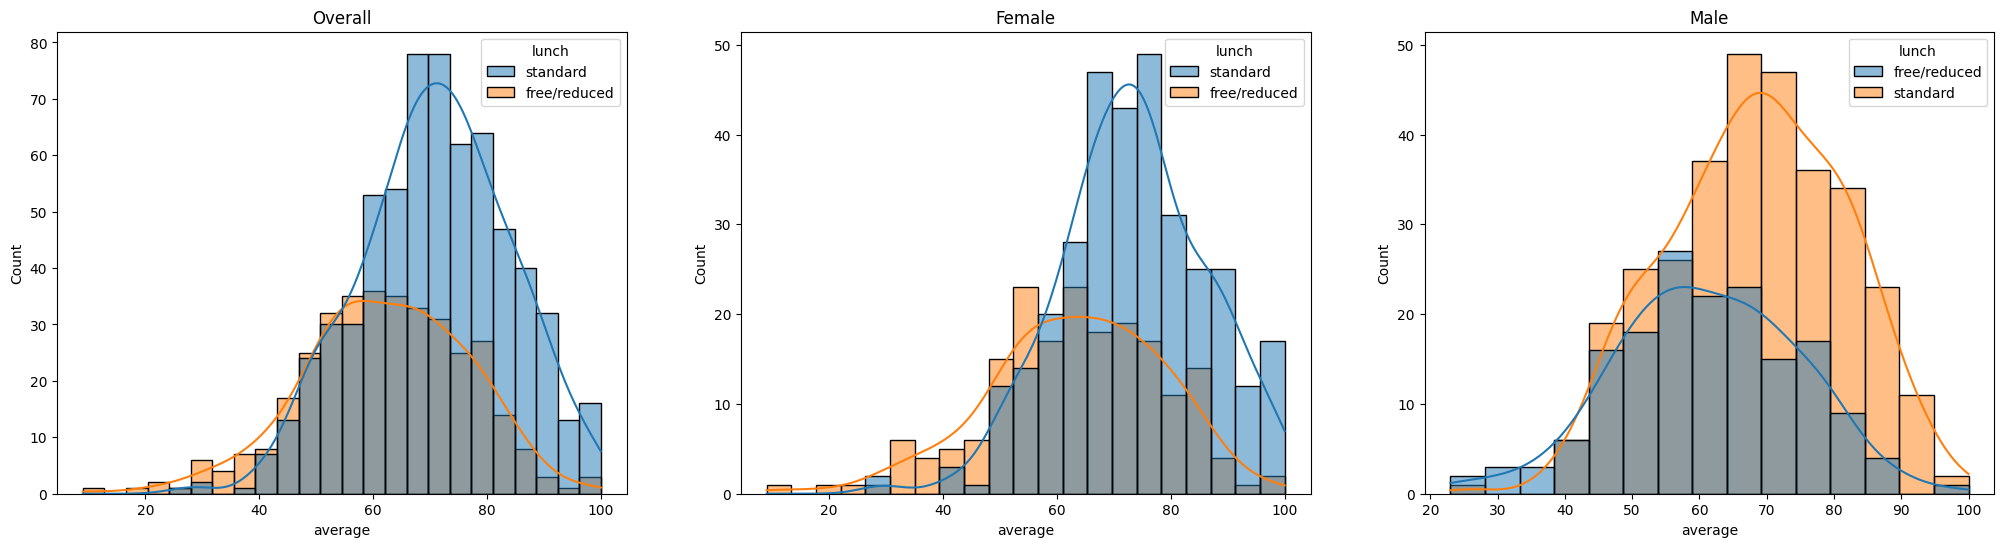

In [ ]:
plt.figure(1,3,figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title("Overall")

plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.title("Female")

plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.title("Male")

plt.show()


**Insights**
- Standard lunch helps students perform well in exams may it be male or female

In [40]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avergae,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


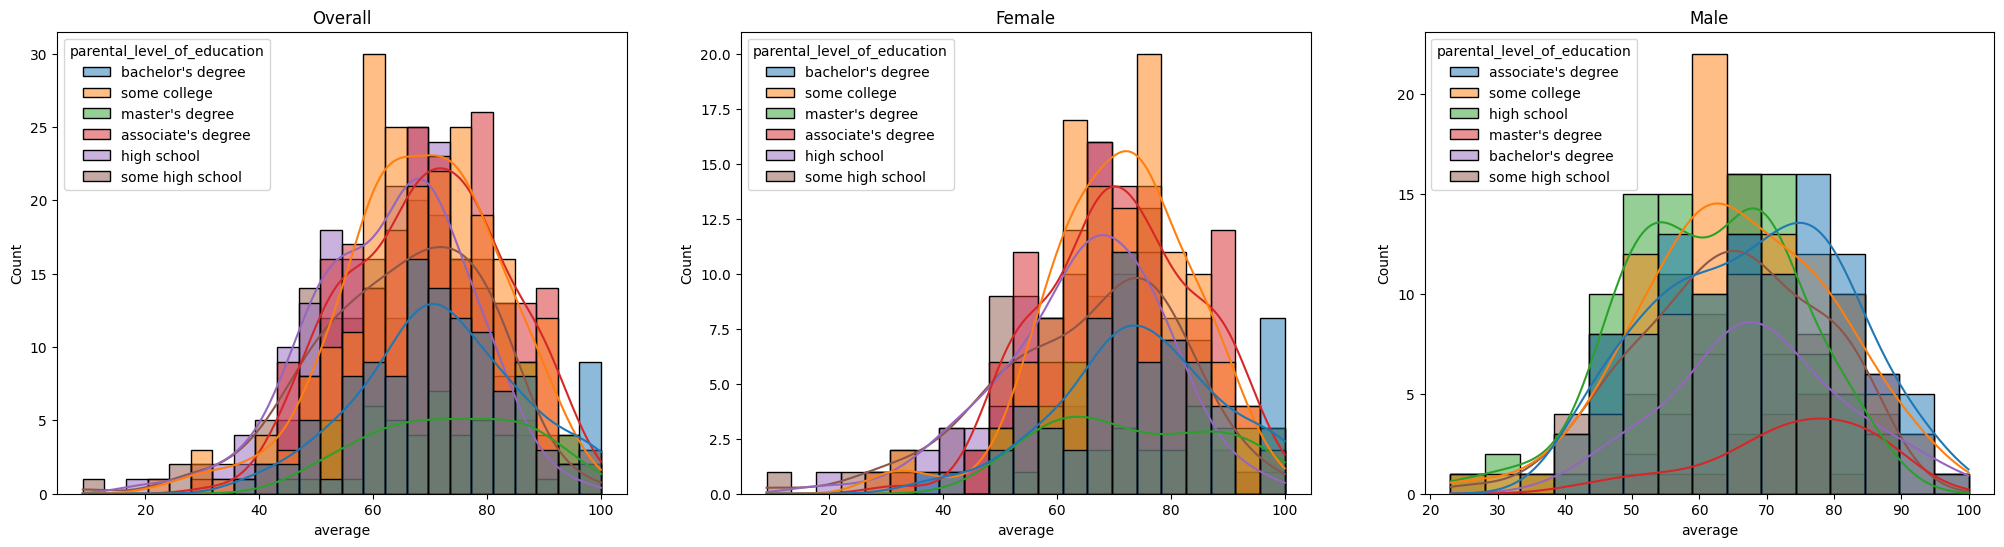

In [43]:
plt.subplots(1,3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.title("Overall")

plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Female")

plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.title("Male")

plt.show()


**Insights**
- It is hard to pinpoint how exactly parent's education help students perform well in exam.

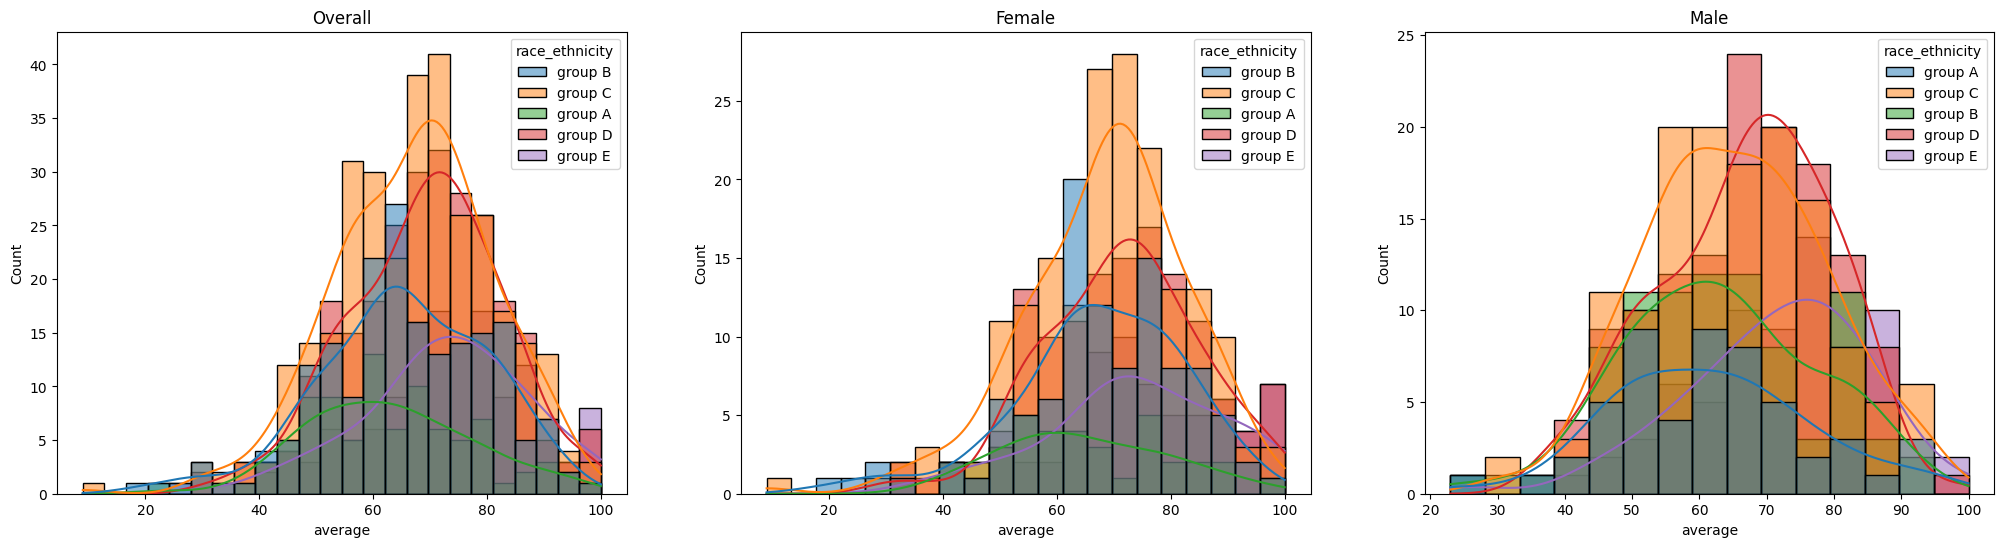

In [44]:
plt.subplots(1,3, figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.title("Overall")

plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity')
plt.title("Female")

plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity')
plt.title("Male")

plt.show()


**Insights**
- Students from group D and E perform better in exams